In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import cv2
import os
import random


X = []
y = []

base_path = r"C:\Users\Lenovo\Desktop\Project\archive"

# Function for augmenting images
def augment_image(image):
    # Flip the image horizontally
    if random.choice([True, False]):
        image = cv2.flip(image, 1)

    # Rotate the image
    angle = random.choice([-30, -15, 0, 15, 30])  # Random rotation angle
    M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
    image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    # Scale and crop randomly
    scale = random.uniform(0.8, 1.2)  # Random scaling
    scaled_img = cv2.resize(image, None, fx=scale, fy=scale)
    if scale > 1.0:
        x_start = (scaled_img.shape[1] - image.shape[1]) // 2
        y_start = (scaled_img.shape[0] - image.shape[0]) // 2
        image = scaled_img[y_start:y_start+image.shape[0], x_start:x_start+image.shape[1]]
    else:
        image = cv2.resize(scaled_img, (image.shape[1], image.shape[0]))

    # Adjust brightness randomly
    if random.choice([True, False]):
        brightness_factor = random.uniform(0.7, 1.3)
        image = np.clip(image * brightness_factor, 0, 1)

    # Add Gaussian noise
    if random.choice([True, False]):
        noise = np.random.normal(0, 0.05, image.shape)
        image = np.clip(image + noise, 0, 1)

    # Adjust contrast
    if random.choice([True, False]):
        contrast_factor = random.uniform(0.7, 1.3)
        mean = np.mean(image)
        image = np.clip((image - mean) * contrast_factor + mean, 0, 1)

    return image

# Loop through all classes and images
for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):
        for data_file in os.listdir(class_path):
            file_path = os.path.join(class_path, data_file)
            print(f"Processing file: {file_path}") 
            X_i = cv2.imread(file_path)
            X_i = cv2.cvtColor(X_i, cv2.COLOR_BGR2RGB)
            X_i = cv2.resize(X_i, (120, 120))
            X_i = X_i / 255.0
            
            # Append original image
            X.append(X_i)
            y.append(class_name)
            
            # Generate multiple augmented images for each original image
            for _ in range(5):  # Generate 5 augmented images per original image
                X_augmented = augment_image(X_i)
                X.append(X_augmented)
                y.append(class_name)

X = np.array(X)
y = np.array(y)


Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (1).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (10).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (100).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (101).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (102).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (103).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (104).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (105).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (106).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (107).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (108).jpeg
Processing file: C:\Users\Lenovo\Desktop\Project\archive\Healthy\healthy (109).

In [4]:
X.shape

(15126, 120, 120, 3)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split

(X_train,X_temp,y_train,y_temp) = train_test_split(X,y,test_size = 0.7,random_state = 45)
(X_test,X_Val,y_test,y_Val) = train_test_split(X_temp,y_temp,test_size = 0.6666666667, random_state =42)

In [7]:
classes = ["Healthy","Mosaic","Redrot","Rust","Yellow"]

In [8]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

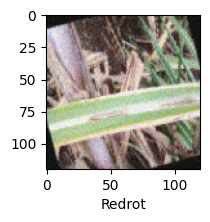

In [9]:
plot_sample(X_train,y_train,24)

In [27]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32,activation = 'relu', kernel_size = (3,3), input_shape = (120,120,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters = 64,activation = 'relu', kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters = 128,activation = 'relu', kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    
    #dense
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation = 'softmax')
])

In [28]:
cnn.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = cnn.fit(X_train,y_train,epochs = 20,validation_data=(X_Val, y_Val))

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.2892 - loss: 1.5838 - val_accuracy: 0.5496 - val_loss: 1.1386
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 27s 190ms/step - accuracy: 0.5736 - loss: 1.0788 - val_accuracy: 0.6365 - val_loss: 0.9431
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 29s 204ms/step - accuracy: 0.6587 - loss: 0.8794 - val_accuracy: 0.6582 - val_loss: 0.8577
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 165ms/step - accuracy: 0.6965 - loss: 0.7579 - val_accuracy: 0.7198 - val_loss: 0.7391
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.7396 - loss: 0.6454 - val_accuracy: 0.7443 - val_loss: 0.6936
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.7888 - loss: 0.5260 - val_accuracy: 0.7511 - val_loss: 0.6526
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.8101 - loss: 0.4848 - val_accuracy: 0.7575 - val_loss: 0.6334
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 160ms/step - accuracy: 0.8445 - loss: 0

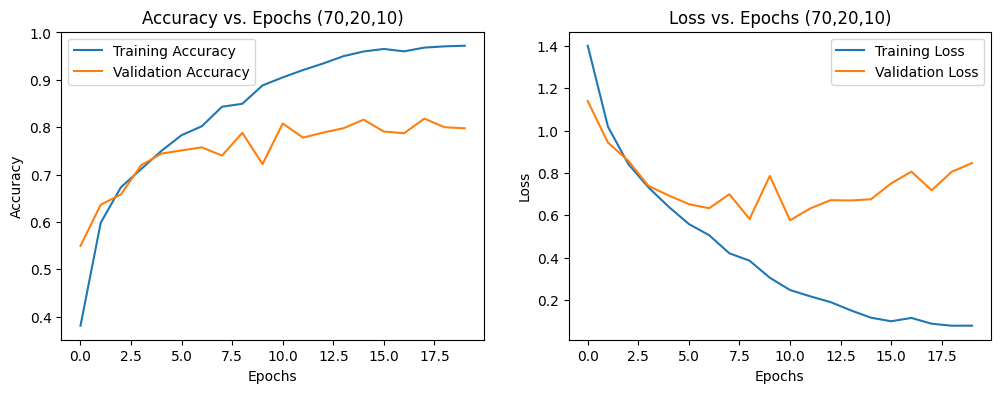

In [45]:
import matplotlib.pyplot as plt

# Plot accuracy vs epochs
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs (70,20,10)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs (70,20,10)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [30]:
cnn.evaluate(X_test,y_test)

111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8054 - loss: 0.8512


[0.8662992715835571, 0.8044772148132324]

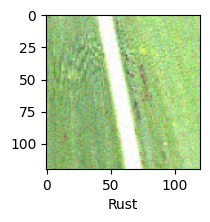

In [31]:
plot_sample(X_test,y_test,1)

In [32]:
y_pred = cnn.predict(X_test)
y_pred[:5]

111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


array([[6.9882296e-04, 1.7998865e-08, 1.7962716e-08, 9.8662162e-01,
        1.2679626e-02],
       [8.3250976e-01, 3.8384895e-03, 3.6525546e-07, 1.6365129e-01,
        9.6826085e-08],
       [1.3841239e-09, 2.4976358e-12, 8.8121074e-01, 1.1878636e-01,
        2.9047590e-06],
       [9.7638543e-04, 1.7021525e-03, 8.8148081e-01, 1.1500062e-01,
        8.4000337e-04],
       [7.1431134e-12, 6.5116020e-19, 9.9228865e-01, 7.7104308e-03,
        9.5014900e-07]], dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 0, 2, 2, 2]

In [34]:
y_test[30]

2

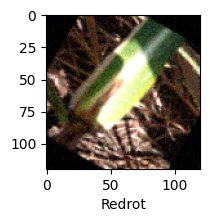

In [35]:
plot_sample(X_test,y_test,30)

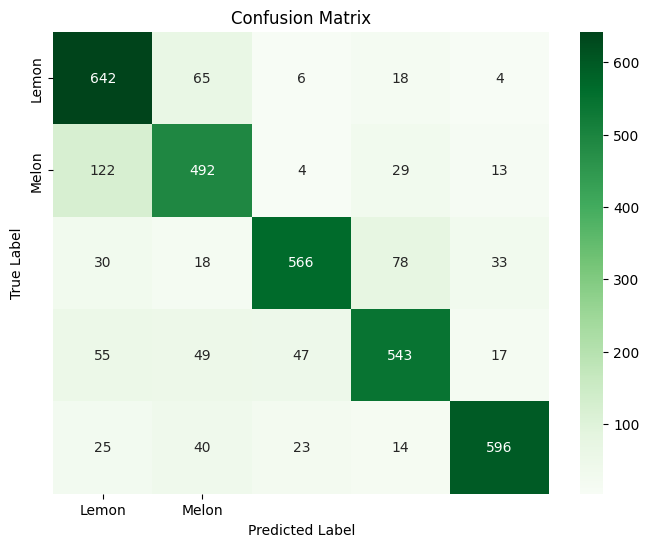

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions

y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Greens', annot=True, fmt='d', 
            xticklabels=["Lemon", "Melon"], 
            yticklabels=["Lemon", "Melon"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']))


              precision    recall  f1-score   support

     Class 1       0.73      0.87      0.80       735
     Class 2       0.74      0.75      0.74       660
     Class 3       0.88      0.78      0.83       725
     Class 4       0.80      0.76      0.78       711
     Class 5       0.90      0.85      0.88       698

    accuracy                           0.80      3529
   macro avg       0.81      0.80      0.80      3529
weighted avg       0.81      0.80      0.81      3529



In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from tensorflow.keras.utils import to_categorical

# Assuming `y_test` contains the true labels and `y_pred` contains the predicted labels

# Convert `y_test` and `y_pred` to one-hot encoded vectors
y_test_onehot = to_categorical(y_test, num_classes=5)
y_pred_onehot = to_categorical(y_pred, num_classes=5)

# Initialize dictionaries to store MSE and MAE for each class
mse_per_class = {}
mae_per_class = {}

# Calculate MSE and MAE for each class
for class_index in range(5):  # 5 classes
    # True and predicted values for the current class
    y_test_class = y_test_onehot[:, class_index]
    y_pred_class = y_pred_onehot[:, class_index]
    
    # Calculate MSE and MAE for the current class
    mse_per_class[f'Class {class_index + 1}'] = mean_squared_error(y_test_class, y_pred_class)
    mae_per_class[f'Class {class_index + 1}'] = mean_absolute_error(y_test_class, y_pred_class)

# Display MSE and MAE for each class on separate lines
print("Mean Squared Error (MSE) per class:")
for class_name, mse_value in mse_per_class.items():
    print(f"{class_name}: {mse_value}")

print("\nMean Absolute Error (MAE) per class:")
for class_name, mae_value in mae_per_class.items():
    print(f"{class_name}: {mae_value}")


Mean Squared Error (MSE) per class:
Class 1: 0.09209407764239161
Class 2: 0.09634457353357892
Class 3: 0.06772456786625106
Class 4: 0.08699348257296685
Class 5: 0.04788892037404364

Mean Absolute Error (MAE) per class:
Class 1: 0.09209407764239161
Class 2: 0.09634457353357892
Class 3: 0.06772456786625106
Class 4: 0.08699348257296685
Class 5: 0.04788892037404364


In [43]:
print("Shape of y_pred:", y_pred.shape)

Shape of y_pred: (3529,)


111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
Shape of y_pred_prob: (3529, 5)


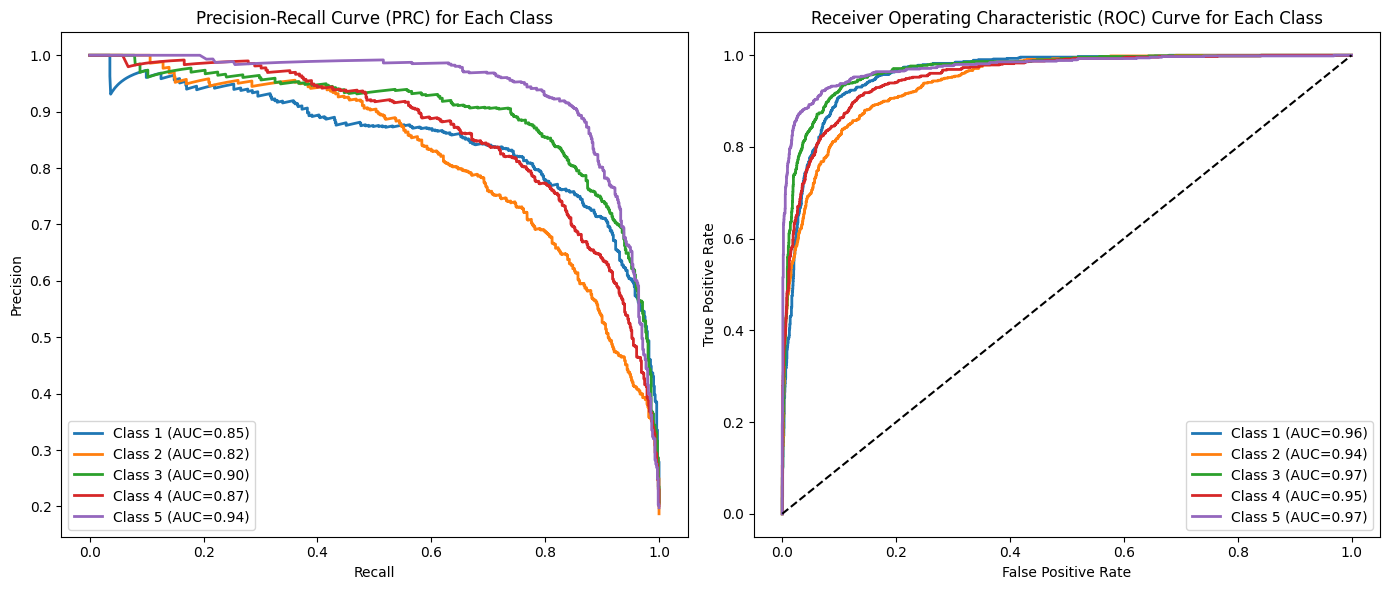

In [44]:
# Assuming cnn is your trained model
y_pred_prob = cnn.predict(X_test)  # Should now have shape (3529, 5) for 5 classes

# Verify the shape
print("Shape of y_pred_prob:", y_pred_prob.shape)  # Should be (3529, 5)

# Convert `y_test` to one-hot encoded vectors if you haven't already
y_test_onehot = to_categorical(y_test, num_classes=5)

# Initialize plots for PRC and ROC curves
plt.figure(figsize=(14, 6))

# Subplot for PRC
plt.subplot(1, 2, 1)
for i in range(5):
    precision, recall, _ = precision_recall_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i + 1} (AUC={auc(recall, precision):.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (PRC) for Each Class")
plt.legend(loc="best")

# Subplot for ROC
plt.subplot(1, 2, 2)
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i + 1} (AUC={auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Each Class")
plt.legend(loc="best")

plt.tight_layout()
plt.show()
